# Decision tree

A decision tree is one of the supervised machine learning algorithms, this algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




In [2]:
#datasets
df=pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


# Lebel Encoder :Dummies method using sklearn.preprocessing import OneHotEncode

In [3]:
from sklearn.preprocessing import LabelEncoder
#Create Le object for LabelEncoder
le=LabelEncoder()
dfle=df
le.fit_transform(dfle.company)
dfle.company=le.fit_transform(dfle.company)

le.fit_transform(dfle.job)
dfle.job=le.fit_transform(dfle.job)

le.fit_transform(dfle.degree)
dfle.degree=le.fit_transform(dfle.degree)


dfle.reset_index(inplace=False)
dfle

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


# Train and test model

In [4]:
X=df[["company","job","degree"]] #input/features
y=df[["salary_more_then_100k"]] #target

In [5]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=1)


classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
classifier.score(X_train,y_train)

1.0

In [7]:
classifier.score(X_test,y_test)

0.75

In [8]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0], dtype=int64)

# Pickle

In [9]:
import pickle
#Model save in file to write mode
with open('salaries.pkl','wb') as f:
    pickle.dump(classifier,f)

In [10]:
#read the file mode
with open('salaries.pkl','rb') as f:
    clfP=pickle.load(f)

# Predict from model

In [11]:
clfP.predict([[1,2,0]])

array([1], dtype=int64)

In [16]:
clfP.predict([[2,2,1]])

array([0], dtype=int64)

# Confusion Matrix

In [13]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [14]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Accuracy is:{accuracy_score(y_pred,y_test)}")


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('F1 score is ',f1_score(y_test, y_pred, average='weighted'))    


Accuracy is:0.75
Precision Score :  0.75
Recall Score :  0.75
F1 score is  0.7666666666666667


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# seaborn

Text(69.0, 0.5, 'Truth')

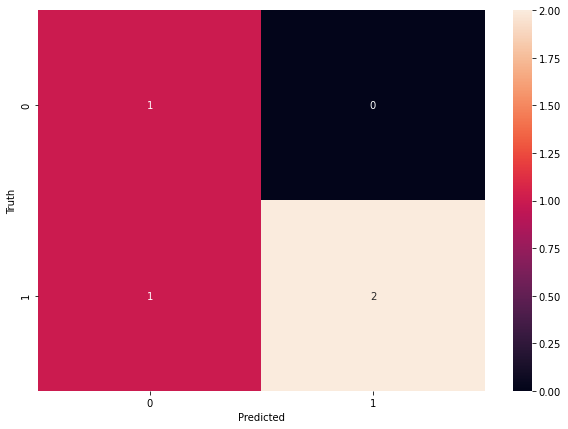

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')